# 히트맵과 클러스터 맵

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="whitegrid")
plt.rcParams['figure.figsize']=(10,6)

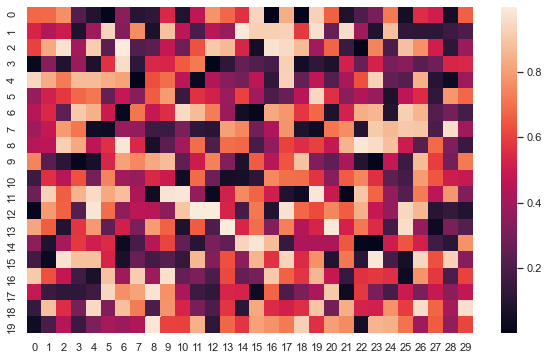

In [2]:
udata = np.random.rand(20, 30)
sns.heatmap(udata);

## 범위 지정하기

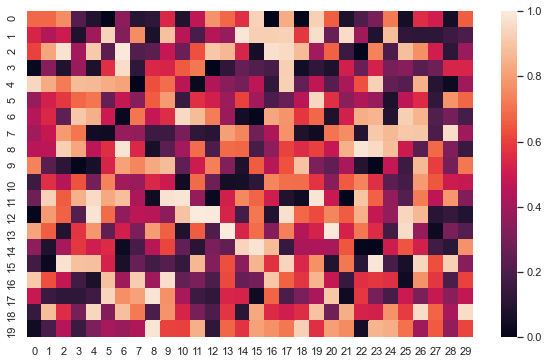

In [3]:
sns.heatmap(udata, vmin=0, vmax=1);

## 컬러바 중앙색 조절하기

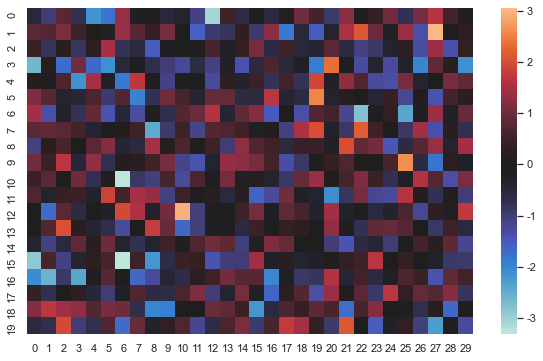

In [4]:
ndata = np.random.randn(20, 30)
sns.heatmap(ndata, center=0);

In [5]:
flights = sns.load_dataset('flights')
flights = flights.pivot('month','year','passengers')
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


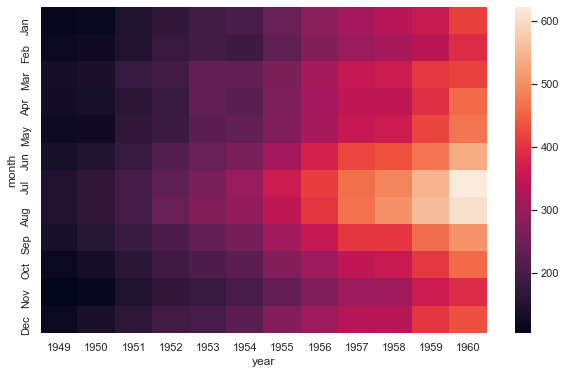

In [6]:
sns.heatmap(flights);

## 히트맵에 관찰값 채우기

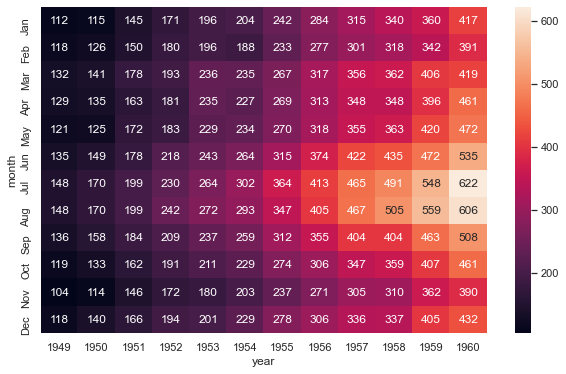

In [7]:
# 네모칸 안에 값도 넣고 싶을 때 annot=True를 지정
sns.heatmap(flights, annot=True, fmt='d');

## 테두리 지정하기

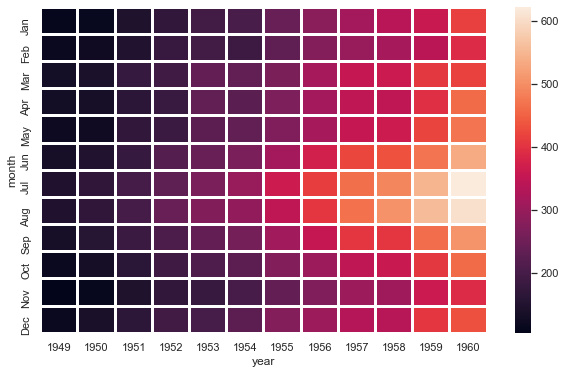

In [8]:
sns.heatmap(flights, linewidths=2);

## 색상 지정하기

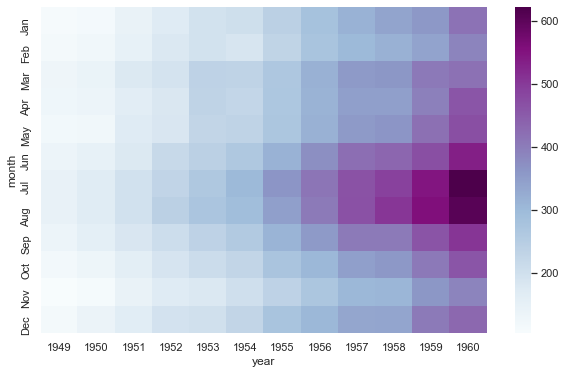

In [9]:
sns.heatmap(flights, cmap='BuPu');

## 컬러바 없애기

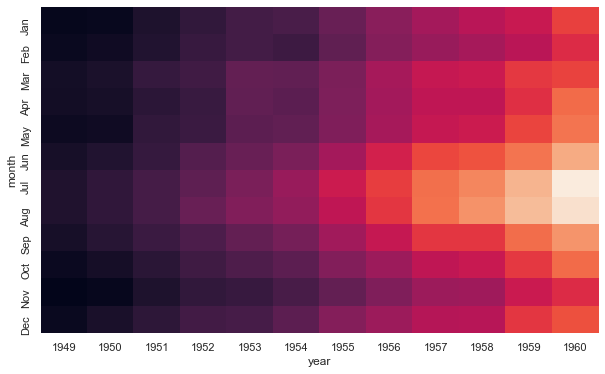

In [10]:
sns.heatmap(flights, cbar=False);

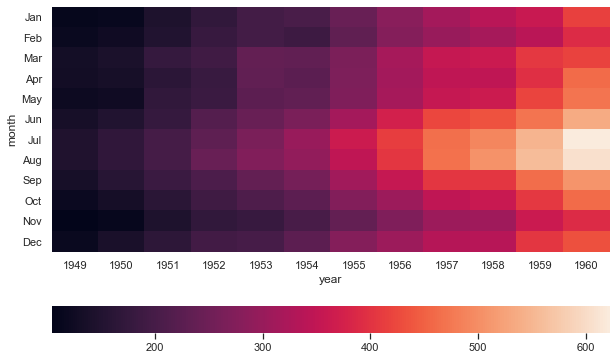

In [22]:
grid_kws={'height_ratios':{0.9, .1}, 'hspace':.4}
# height_ratios = 컬러바의 위치와 두께
# hspace= 여백
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)
ax = sns.heatmap(flights, ax=ax,
                 cbar_ax = cbar_ax,
                 cbar_kws={'orientation':'horizontal'})

In [30]:
brain_networks = sns.load_dataset('brain_networks', header=[0, 1, 2], index_col=0)
# 0, 1, 2열을 헤더로 지정하고 0행을 index로 지정하여 불러온다.
brain_networks.head()

network          1                     2                     3             \
node             1                     1                     1              
hemi            lh         rh         lh         rh         lh         rh   
0        56.055744  92.031036   3.391576  38.659683  26.203819 -49.715569   
1        55.547253  43.690075 -65.495987 -13.974523 -28.274963 -39.050129   
2        60.997768  63.438793 -51.108582 -13.561346 -18.842947  -1.214659   
3        18.514868  12.657158 -34.576603 -32.665958  -7.420454  17.119448   
4        -2.527392 -63.104668 -13.814151 -15.837989 -45.216927   3.483550   

network          4                     5             ...         16  \
node             1                     1             ...          3   
hemi            lh         rh         lh         rh  ...         rh   
0        47.461037  26.746613 -35.898861  -1.889181  ...   0.607904   
1        -1.210660 -19.012897  19.568010  15.902983  ...  57.495071   
2       -65.575806 -85.777428  19.247454  37.209419  ...  28.317369   
3       -41.800869 -58.610184  32.896915  11.199619  ...  71.439629   
4       -62.613335 -49.076508  18.396759   3.219077  ...  95.597565   

network                                17                                   \
node             4                      1                     2              
hemi            lh          rh         lh         rh         lh         rh   
0       -70.270546   77.365776 -21.734550   1.028253   7.791784  68.903725   
1       -76.393219  127.261360 -13.035799  46.381824 -15.752450  31.000332   
2         9.063977   45.493263  26.033442  34.212200   1.326110 -22.580757   
3        65.842979  -10.697547  55.297466   4.255006  -2.420144  12.098393   
4        50.960453  -23.197300  43.067562  52.219875  28.232882 -11.719750   

network                                    
node             3                      4  
hemi            lh          rh         lh  
0       -10.520872  120.490463 -39.686432  
1       -39.607521   24.764011 -36.771008  
2        12.985169  -75.027451   6.434262  
3       -15.819172  -37.361431  -4.650954  
4         5.453649    5.169828  87.809135  

[5 rows x 62 columns]

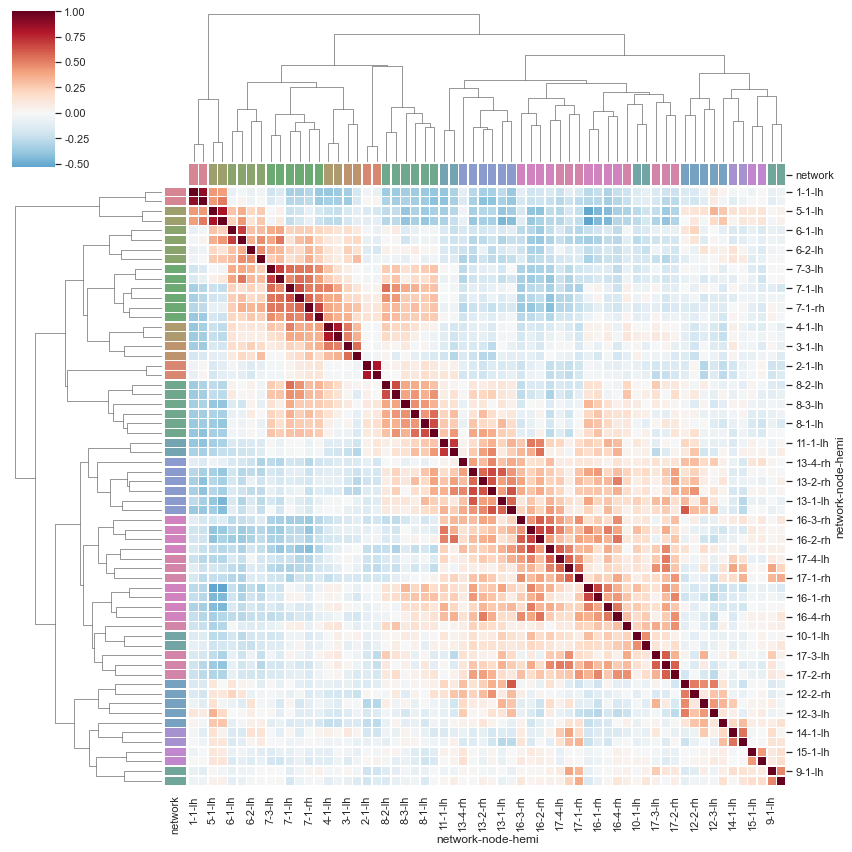

In [32]:
networks = brain_networks.columns.get_level_values('network')
used_networks=np.arange(1, 18)
used_columns=(networks.astype(int).isin(used_networks))
brain_networks = brain_networks.loc[:,used_columns]

network_pal = sns.husl_palette(17, s=.5)
network_lut = dict(zip(map(str, used_networks), network_pal))
network_colors = pd.Series(networks, index=brain_networks.columns).map(network_lut)

sns.clustermap(brain_networks.corr(), center=0, cmap='RdBu_r',
               row_colors=network_colors, col_colors=network_colors,
               linewidth=.5, figsize=(12, 12));